## K-Means

K-Means 클러스터링 알고리즘은 가장 단순하고 빠른 클러스터링 알고리즘의 하나이다. 

#### 다음과 같은 목적함수 값이 최소화될 때까지 클러스터의 중심(centroid) 위치와 각 데이터가 소속될 클러스터를 반복해서 찾는다. 이 값을 inertia라고도 한다.

$$J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)$$

이 식에서  𝐾 는 클러스터의 갯수이고  𝐶𝑘 는  𝑘 번째 클러스터에 속하는 데이터의 집합,   𝜇𝑘 는  𝑘 번째 클러스터의 중심 위치,  𝑑 는  𝑥𝑖, 𝜇𝑘  두 데이터 사이의 거리(distance) 혹은 비유사도(dissimilarity)로 정의한다. 만약 유클리드 거리를 사용한다면 다음과 같다.

$$d(x_i, \mu_k) = || x_i - \mu_k ||^2$$

세부 알고리즘은 다음과 같다.

(1) 임의의 중심값  𝜇𝑘  를 고른다. 보통 데이터 샘플 중에서  𝐾 개를 선택한다.

(2) 중심에서 각 데이터까지의 거리를 계산

(3) 각 데이터에서 가장 가까운 중심을 선택하여 클러스터 갱신

(4) 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

#### scikit-learn의 cluster 서브패키지는 KMeans 클러스터링을 위한 KMeans 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

+ n_clusters: 클러스터의 갯수
+ init : 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
+ n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
+ max_iter: 최대 반복 횟수.
+ random_state: 시드값.

다음은 make_blobs 명령으로 만든 데이터를 2개로 K-means 클러스터링하는 과정을 나타낸 것이다. 마커(marker)의 모양은 클러스터를 나타내고 크기가 큰 마커가 중심값 위치이다. 각 단계에서 중심값은 전단계의 클러스터의 평균으로 다시 계산된다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

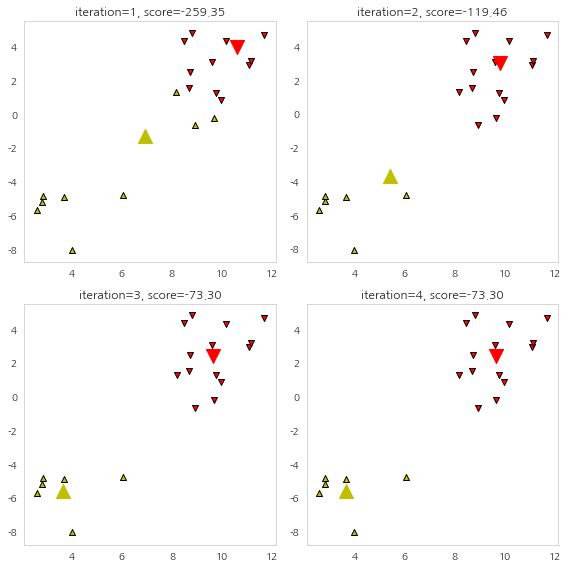

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X) 
    # 클러스터 2개, 초기화는 random, 초기중심(n_init) 1, 최대 반복횟수 n
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c='r', s=200)
    plt.scatter(c1[0], c1[1], marker='^', c='y', s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))
    
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_KMeans(1)
plt.subplot(222)
plot_KMeans(2)
plt.subplot(223)
plot_KMeans(3)
plt.subplot(224)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## K-Means++

K-Means++ 알고리즘은 초기 중심값을 설정하기 위한 알고리즘이다. 다음과 같은 방법을 통해 되도록 멀리 떨어진 중심값 집합을 찾아낸다.

(1) 중심값을 저장할 집합  𝑀  준비

(2) 일단 하나의 중심  𝜇0 를 랜덤하게 선택하여  𝑀 에 넣는다.

(3) 𝑀 에 속하지 않는 모든 샘플  𝑥𝑖 에 대해 거리  𝑑(𝑀,𝑥𝑖) 를 계산.  𝑑(𝑀,𝑥𝑖) 는  𝑀 안의 모든 샘플  𝜇𝑘 에 대해 𝑑(𝜇𝑘,𝑥𝑖) 를 계산하여 가장 작은 값 선택

(4) 𝑑(𝑀,𝑥𝑖) 에 비례한 확률로 다음 중심  𝜇 를 선택.

(5) 𝐾 개의 중심을 선택할 때까지 반복

(6) K-Means 알고리즘 사용

다음은 KMean 방법을 사용하여 MNIST Digit 이미지 데이터를 클러스터링한 결과이다. 각 클러스터에서 10개씩의 데이터만 표시하였다.

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

y_pred

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [5]:
y_pred.shape

(1797,)

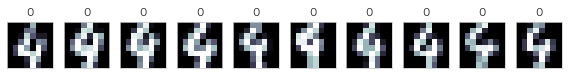

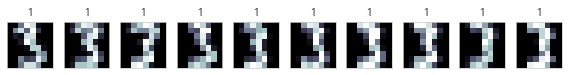

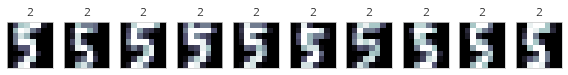

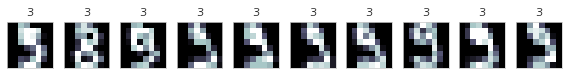

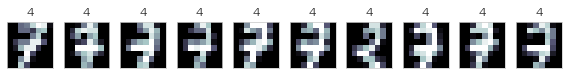

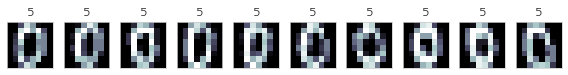

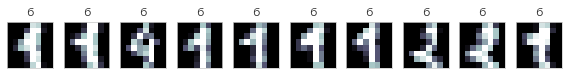

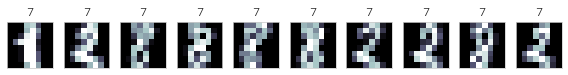

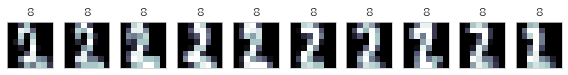

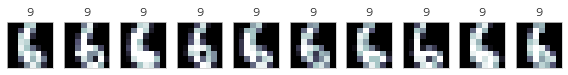

In [6]:
def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while(i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i+1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
for i in range(10):
    show_cluster(digits.images, y_pred, i)  

이미지의 제목에 있는 숫자는 클러스터 번호에 지나지 않으므로 원래 숫자의 번호와 일치하지 않는다. 하지만 이를 예측문제라고 가정하고 분류결과행렬을 만들면 다음과 같다.

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [8]:
from sklearn.metrics import classification_report
print(classification_report(digits.target, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       178
           1       0.01      0.01      0.01       182
           2       0.00      0.00      0.00       177
           3       0.05      0.07      0.06       183
           4       0.03      0.04      0.04       181
           5       0.00      0.00      0.00       182
           6       0.01      0.01      0.01       181
           7       0.01      0.01      0.01       179
           8       0.02      0.02      0.02       174
           9       0.00      0.00      0.00       180

    accuracy                           0.02      1797
   macro avg       0.01      0.02      0.01      1797
weighted avg       0.01      0.02      0.01      1797



이 클러스터링 결과의 ARI, AMI, 실루엣 계수값은 다음과 같다.

In [9]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

In [11]:
print("ARI:", adjusted_rand_score(digits.target, y_pred))  # 모든 쌍의 경우에 대해 정답인 쌍의 갯수 비율로 정의
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred)) # 정답과 결과를 이산확률변수로 보고 상호의존성을 측정한 값
print("Silhouette Score:", silhouette_score(digits.data, y_pred)) # 모든 쌍의 거리 혹은 비유사도로 측정

ARI: 0.6686991223627669
AMI: 0.7397973157276612
Silhouette Score: 0.18251916424600556


### 연습 문제 1

붓꽃 데이터를 K=3인 K-Means 클러스터링하여 adjusted Rand index, adjusted mutual information, 실루엣 계수를 각각 계산하라.

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

model = KMeans(init='k-means++', n_clusters=3, random_state=0)
model.fit(iris.data)
y_pred = model.labels_
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
print("ARI:", adjusted_rand_score(iris.target, y_pred))
print("AMI:", adjusted_mutual_info_score(iris.target, y_pred))
print("Silhouette Score:", silhouette_score(iris.data, y_pred))

ARI: 0.7302382722834697
AMI: 0.7483723933229485
Silhouette Score: 0.5528190123564091


In [14]:
confusion_matrix(iris.target, y_pred)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])